In [12]:
import pandas as pd
from sklearn.cluster import KMeans 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('/home/pancrackhead/Desktop/portfolio_ml/kmeans/mall_customers/Mall_Customers.csv')

In [14]:
data = data.replace(["Male", "Female"], [0, 1])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [17]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


/home/pancrackhead/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pancrackhead/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pancrackhead/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pancrackhead/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

/home/pancrackhead/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pancrackhead/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


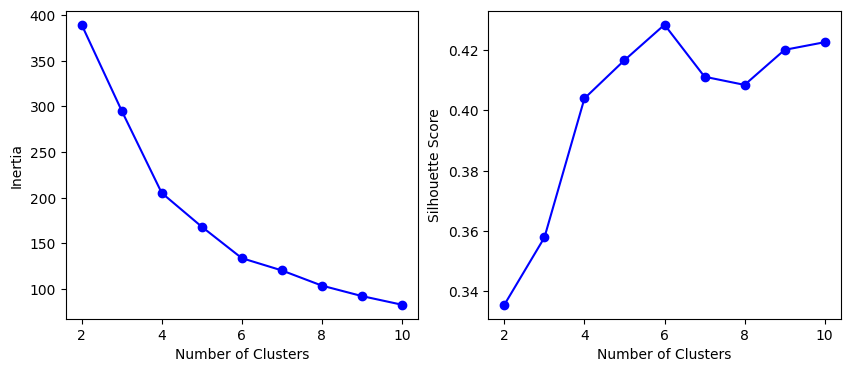

In [19]:
#Elbow Method 
k_range = range(2, 11)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

#silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()

In [20]:
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

/home/pancrackhead/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [21]:
cluster_assignments = kmeans.labels_

In [22]:
data['Cluster'] = cluster_assignments
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)


for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    print(f'Cluster {i+1} has {len(cluster_data)} data points')

Cluster 1 has 47 data points
Cluster 2 has 40 data points
Cluster 3 has 54 data points
Cluster 4 has 20 data points
Cluster 5 has 39 data points


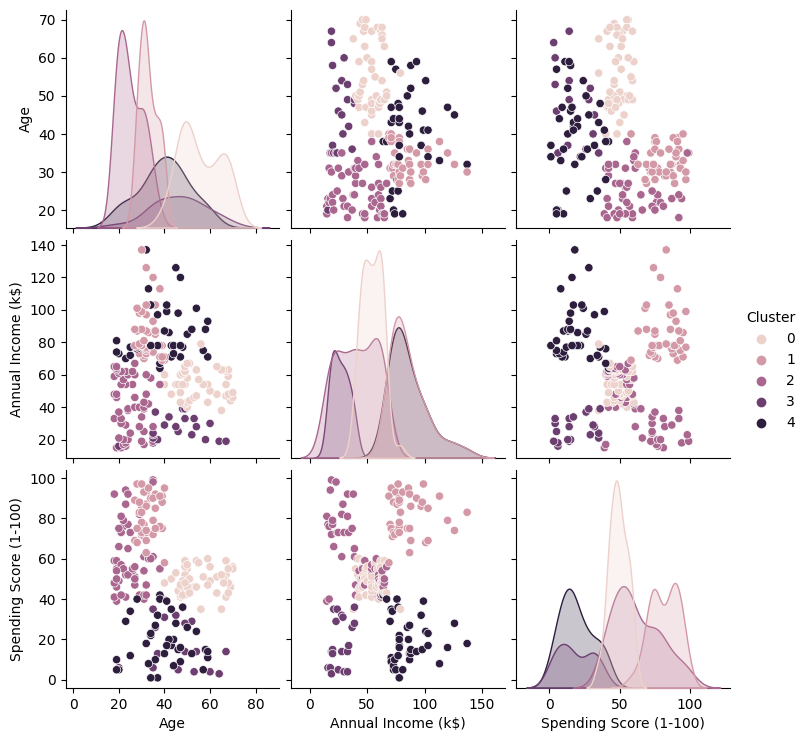

In [23]:

data['Cluster'] = cluster_assignments
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()


In [24]:
#zrobić ewauluacje spending score, ile